1. First, load the dataset from the weatherinszeged table from Thinkful's database.

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.formula.api as smf
from sqlalchemy import create_engine

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")


postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

houseprices_df = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()


In [32]:
houseprices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [33]:
for column_name in houseprices_df.columns:
    print("Unique values in column {} are: {}".format(column_name, houseprices_df[column_name].unique()))

Unique values in column id are: [   1    2    3 ... 1458 1459 1460]
Unique values in column mssubclass are: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
Unique values in column mszoning are: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Unique values in column lotfrontage are: [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
Unique values in column lotarea are: [ 8450  9600 11250 ... 17217 13175  9717]
Unique values in column street are: ['Pave' 'Grvl']
Unique values in column 

In [34]:
houseprices_df.isnull().sum()

id                  0
mssubclass          0
mszoning            0
lotfrontage       259
lotarea             0
street              0
alley            1369
lotshape            0
landcontour         0
utilities           0
lotconfig           0
landslope           0
neighborhood        0
condition1          0
condition2          0
bldgtype            0
housestyle          0
overallqual         0
overallcond         0
yearbuilt           0
yearremodadd        0
roofstyle           0
roofmatl            0
exterior1st         0
exterior2nd         0
masvnrtype          8
masvnrarea          8
exterqual           0
extercond           0
foundation          0
                 ... 
bedroomabvgr        0
kitchenabvgr        0
kitchenqual         0
totrmsabvgrd        0
functional          0
fireplaces          0
fireplacequ       690
garagetype         81
garageyrblt        81
garagefinish       81
garagecars          0
garagearea          0
garagequal         81
garagecond         81
paveddrive

2. Build a regression model where the target variable is *salesprice*. As explanatory variables, use *lotarea, poolarea, yrsold*. Estimate the model using OLS.

In [35]:
# Y is the target variable
Y = houseprices_df['saleprice']
# X is the feature set which includes
X = houseprices_df[['lotarea','yearbuilt','garagearea', 'poolarea']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [  1.40132897 813.15577743 163.6854535   99.46767792]

Intercept: 
 -1514458.53709853


3. Now, check if your model meets the Gauss-Markov Conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

#### Assumption ONE: linearity of the model in its coefficient


Coefficients: 
 [  1.40132897 813.15577743 163.6854535   99.46767792]

Intercept: 
 -1514458.53709853


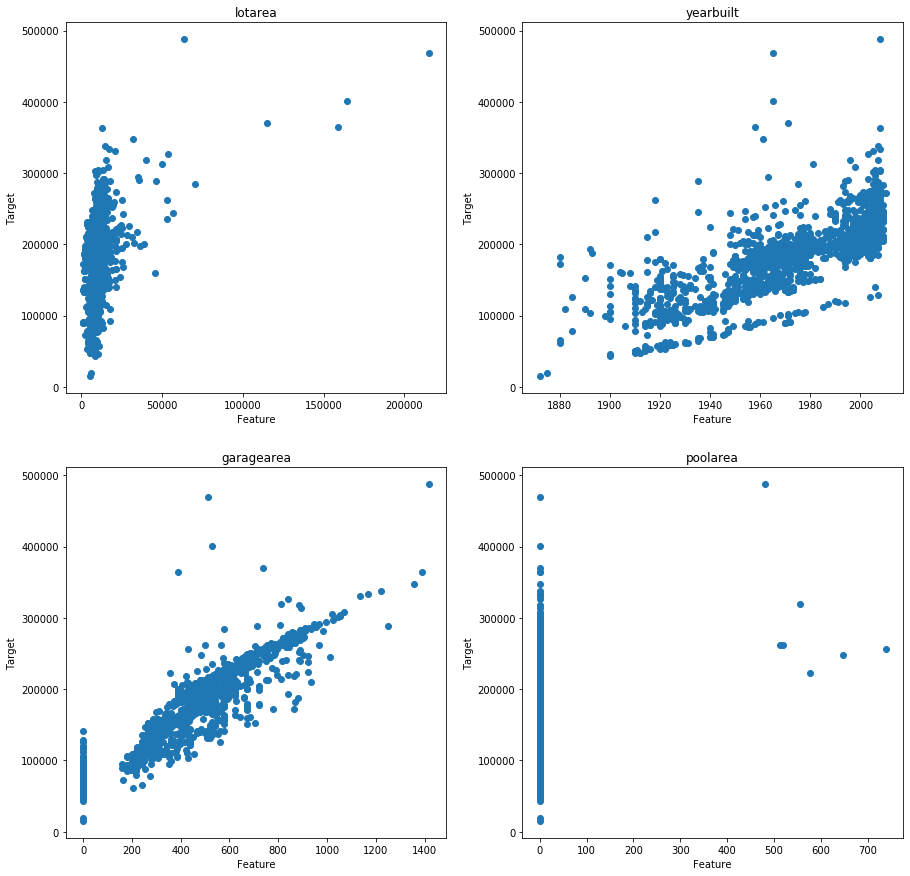

In [37]:
# we fit a linear regression where target is Y
# and features are humidity, windspeed, windbearing, and pressure
lrm_example = linear_model.LinearRegression()
lrm_example.fit(houseprices_df[['lotarea','yearbuilt','garagearea', 'poolarea']],
                houseprices_df['saleprice'])

# predictions of the linear regression
predictions = lrm_example.predict(weather_df[['lotarea','yearbuilt','garagearea', 'poolarea']])

# we print the estimated coefficients
print('\nCoefficients: \n', lrm_example.coef_)
print('\nIntercept: \n', lrm_example.intercept_)

plt.figure(figsize = (15,15))

# we plot the estimated Y and X
# the relationship should be quadratic
plt.subplot(2,2,1)
plt.scatter(houseprices_df[['lotarea']], predictions)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title('lotarea')

plt.subplot(2,2,2)
plt.scatter(houseprices_df[['yearbuilt']], predictions)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title('yearbuilt')


plt.subplot(2,2,3)
plt.scatter(houseprices_df[['garagearea']], predictions)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title('garagearea')

plt.subplot(2,2,4)
plt.scatter(houseprices_df[['poolarea']], predictions)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title('poolarea')


plt.show()



#### Assumption TWO: the error term should be zero on average

In [38]:
predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors in the model is: {}".format(np.mean(errors)))

Mean of the errors in the model is: 1.2438897400686186e-10


#### Assumption THREE: homoscedasticity

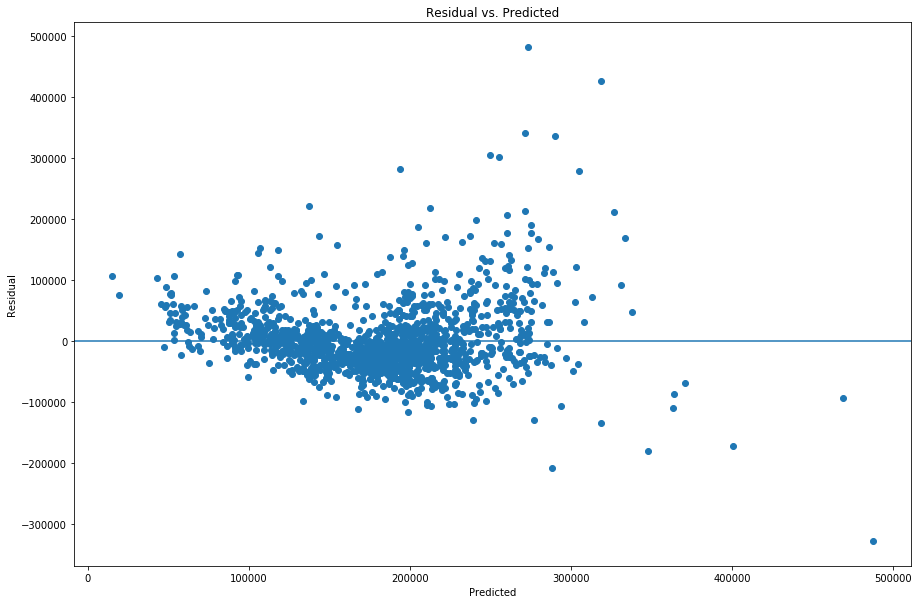

In [39]:
plt.figure(figsize = (15,10))
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [40]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 0.927167 and p value is 0.336
Levene test statistic value is 14.0008 and p value is 0.000186


#### Assumption FOUR: low multicollinearity

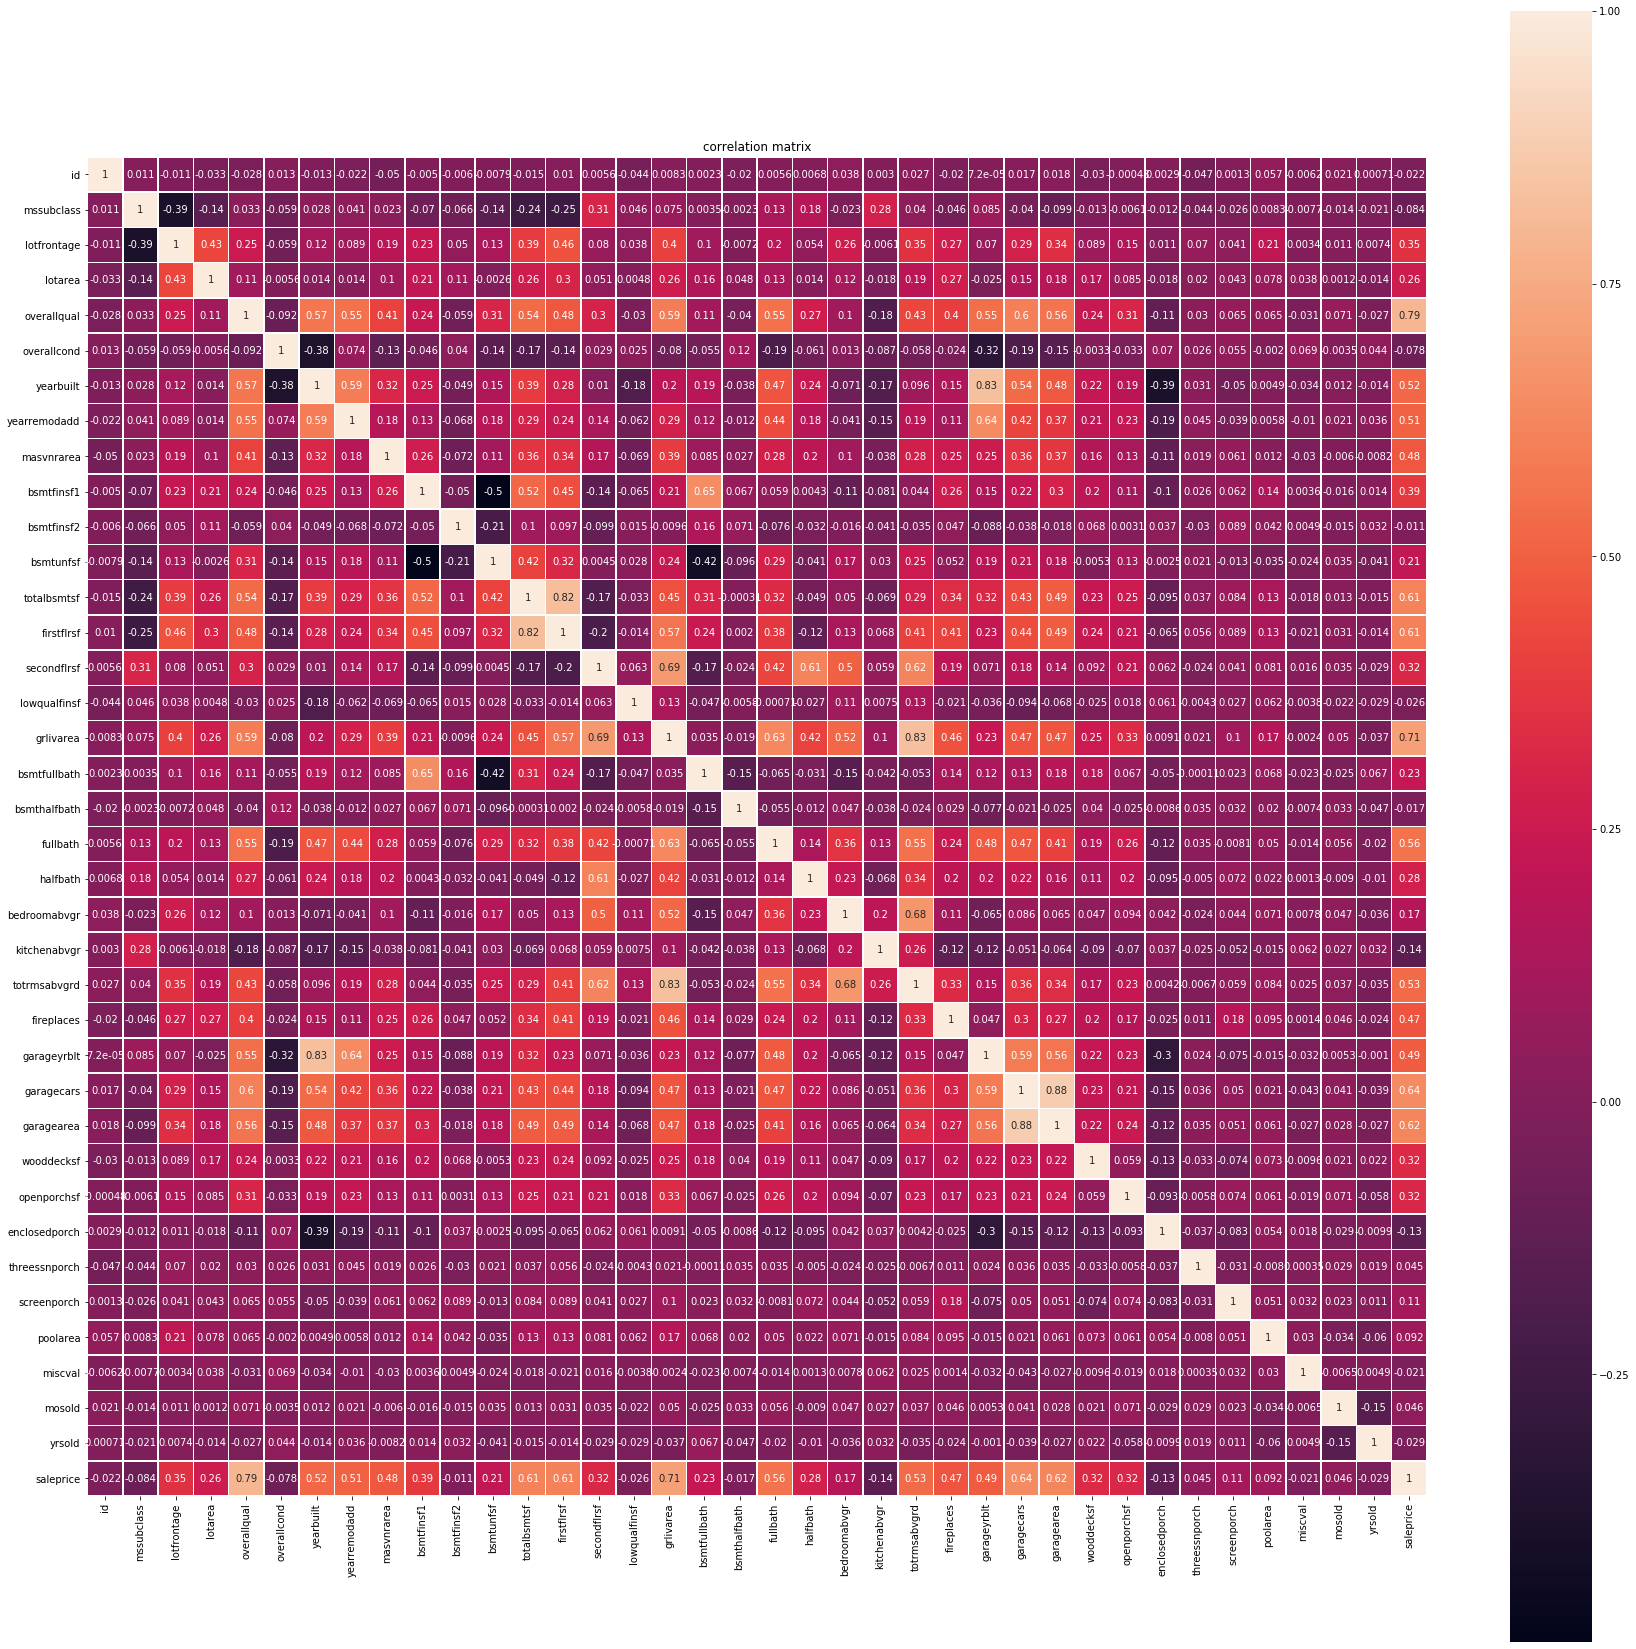

In [43]:
import seaborn as sns

# make the correlation matrices.
houseprices_cmat = houseprices_df.corr()

plt.figure(figsize=(30,30))

# draw the heatmap using seaborn.
sns.heatmap(houseprices_cmat, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix")
plt.show()

note to self: if blank it means there's NAN

#### Assumption FIVE: error terms should be uncorrelated with one another

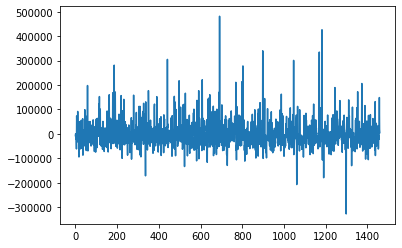

In [44]:
plt.plot(errors)
plt.show()

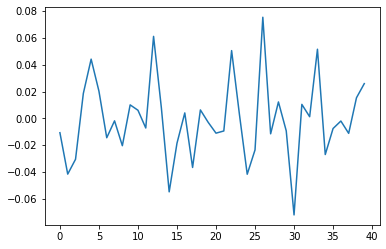

In [45]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

#### Assumption SIX: features shouldn't be correlated with the errors

In [46]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 7210.037778841848 and p value is 0.0
Normality test statistics is 662.3357251633731 and p value is 1.4983894173000467e-144
